<a href="https://colab.research.google.com/github/Daniel322111/DS_and_ML_projects/blob/master/Second_Avenue_Subway_Text_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install praw
import praw

reddit = praw.Reddit(client_id='qjS2-KD1gkfsYMplOXMXhA',
                     client_secret='0RuIJ_ogxP7KJDOlovbfjucA8Myh8w',
                     user_agent='twohatguy')

for submission in reddit.subreddit('Python').hot(limit=10):
    print(submission.title)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Sunday Daily Thread: What's everyone working on this week?
Wednesday Daily Thread: Beginner questions
Declarative GUI for Python
Python-oracledb 2.0 for Oracle Database introduces asyncio support
Asyncio Task Cancellation Best Practices
I recorded a crash course on Polars library of Python (Great library for working with big data) and uploaded it on Youtube
MiniLang - C succesor
Convenient SQL databases terminal client
[blog] Convert data streams to Parquet Files in Python
Questions regarding OpenAPI Generator CLI and Swagger Codegen with Python and Flask


In [ ]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [42]:
import praw
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Initialize PRAW and SentimentIntensityAnalyzer
reddit = praw.Reddit(client_id='qjS2-KD1gkfsYMplOXMXhA',
                     client_secret='0RuIJ_ogxP7KJDOlovbfjucA8Myh8w',
                     user_agent='twohatguy')
sia = SentimentIntensityAnalyzer()

# Search for submissions related to the Second Avenue Subway and limit to 20 submissions
submissions = reddit.subreddit('all').search('Second Avenue Subway', limit=20)

# Analyzing sentiment of comments
sentiments = []
for submission in submissions:
    # Limit to 100 comments from each submission
    submission.comments.replace_more(limit=100)
    for comment in submission.comments.list():
        sentiment_score = sia.polarity_scores(comment.body)
        sentiments.append({
            "comment": comment.body,
            "sentiment": sentiment_score['compound']
        })

        # Check if you have collected approximately 2000 comments and exit the loop
        if len(sentiments) >= 2000:
            break

    # Check again to break the outer loop
    if len(sentiments) >= 2000:
        break

# Convert to DataFrame for easier handling
df = pd.DataFrame(sentiments)

# Display the DataFrame
print(df)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

                                                comment  sentiment
0     It's going to be great to watch Cuomo run on i...     0.3400
1     This is the type of shit that makes me miss Go...    -0.6369
2                                             [deleted]     0.0000
3     I'm on this exact train car right now. I was a...     0.0000
4     BS. You'll always have naysayers - but the fac...    -0.7269
...                                                 ...        ...
1532  This is the rarest sort of comment on Reddit. ...     0.5994
1533  Eh. It probably is like doing open-heart surge...     0.3612
1534  Nobody wants to actually hear this they just w...    -0.0258
1535          The G train is known as the “lime” train.     0.0000
1536  Yeah, I stand by my original point, but it’s s...     0.5744

[1537 rows x 2 columns]


In [62]:
import praw
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import datetime

# Initialize PRAW and SentimentIntensityAnalyzer
reddit = praw.Reddit(client_id='qjS2-KD1gkfsYMplOXMXhA',
                     client_secret='0RuIJ_ogxP7KJDOlovbfjucA8Myh8w',
                     user_agent='twohatguy')
sia = SentimentIntensityAnalyzer()

# Define the start and end dates (January 1, 2014 to January 1, 2017) in Unix timestamp
start_date = int(datetime.datetime(2014, 1, 1).timestamp())
end_date = int(datetime.datetime(2017, 1, 1).timestamp())

# Define the desired number of comments to collect
desired_comment_count = 2000

# Search for comments related to the Second Avenue Subway and limit to 100 submissions
submissions = reddit.subreddit('all').search('Second Avenue Subway', limit=100)

# Analyzing sentiment of comments
sentiments = []
comment_count = 0

for submission in submissions:
    # Limit to 100 comments from each submission
    submission.comments.replace_more(limit=100)

    for comment in submission.comments.list():
        creation_date = comment.created_utc

        # Check if the comment falls within the specified date range
        if start_date <= creation_date < end_date:
            sentiment_score = sia.polarity_scores(comment.body)
            sentiments.append({
                "comment": comment.body,
                "sentiment": sentiment_score['compound'],
                "creation_date": creation_date  # Extract and store creation time
            })

            comment_count += 1

            # Check if you have collected the desired number of comments and exit the loop
            if comment_count >= desired_comment_count:
                break

    # Check again to break the outer loop
    if comment_count >= desired_comment_count:
        break

# Convert to DataFrame for easier handling and indicate it's prior to 2017
df_sentiments_pre_2017 = pd.DataFrame(sentiments)

# Display the DataFrame
print("Number of comments collected:", len(df_sentiments_pre_2017))
print(df_sentiments_pre_2017)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Number of comments collected: 2000
                                                comment  sentiment  \
0     Great news.  I worked on the 72nd St station. ...     0.5423   
1     Thank the lord.  I can't wait to not have to l...     0.3612   
2     Followed by an escalator breaking down at 12:0...     0.0000   
3                       I'll believe it when I see it.      0.0000   
4     This is what tax payer money is for. I can sup...     0.4019   
...                                                 ...        ...   
1995                                          [removed]     0.0000   
1996  Good on you, I still love science and chemistr...     0.9571   
1997  I'm an electrician and in my experience, all y...     0.9423   
1998  Probably one of the best trades for anyone wit...     0.9792   
1999  > For most people, a masters degree is a waste...    -0.4617   

      creation_date  
0      1.482160e+09  
1      1.482157e+09  
2      1.482159e+09  
3      1.482174e+09  
4      1.48217

In [63]:
import praw
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import datetime

# Initialize PRAW and SentimentIntensityAnalyzer
reddit = praw.Reddit(client_id='qjS2-KD1gkfsYMplOXMXhA',
                     client_secret='0RuIJ_ogxP7KJDOlovbfjucA8Myh8w',
                     user_agent='twohatguy')
sia = SentimentIntensityAnalyzer()

# Define the start date (January 1, 2017) in Unix timestamp
start_date = int(datetime.datetime(2017, 1, 1).timestamp())

# Define the desired number of comments to collect
desired_comment_count = 2000

# Search for comments related to the Second Avenue Subway and limit to 100 submissions
submissions = reddit.subreddit('all').search('Second Avenue Subway', time_filter='all', limit=100)

# Analyzing sentiment of comments
sentiments_pre_2017 = []
sentiments_post_2017 = []
comment_count_pre_2017 = 0
comment_count_post_2017 = 0

for submission in submissions:
    # Limit to 100 comments from each submission
    submission.comments.replace_more(limit=100)

    for comment in submission.comments.list():
        creation_date = comment.created_utc
        sentiment_score = sia.polarity_scores(comment.body)
        comment_data = {
            "comment": comment.body,
            "sentiment": sentiment_score['compound'],
            "creation_date": creation_date  # Extract and store creation time
        }

        # Check if the comment was created before or after January 1, 2017
        if creation_date < start_date:
            sentiments_pre_2017.append(comment_data)
            comment_count_pre_2017 += 1
        else:
            sentiments_post_2017.append(comment_data)
            comment_count_post_2017 += 1

        # Check if you have collected the desired number of comments and exit the loop
        if comment_count_pre_2017 + comment_count_post_2017 >= desired_comment_count:
            break

    # Check again to break the outer loop
    if comment_count_pre_2017 + comment_count_post_2017 >= desired_comment_count:
        break

# Convert to DataFrames for easier handling and indicate the time period
df_sentiments_pre_2017 = pd.DataFrame(sentiments_pre_2017)
df_sentiments_post_2017 = pd.DataFrame(sentiments_post_2017)

# Display the DataFrames
print("Number of comments collected (Before 2017):", len(df_sentiments_pre_2017))
print("Number of comments collected (After 2017):", len(df_sentiments_post_2017))

# Analysis for data before 2017
mean_sentiment_pre_2017 = df_sentiments_pre_2017['sentiment'].mean()
summary_pre_2017 = df_sentiments_pre_2017['sentiment'].describe()

# Analysis for data after 2017
mean_sentiment_post_2017 = df_sentiments_post_2017['sentiment'].mean()
summary_post_2017 = df_sentiments_post_2017['sentiment'].describe()

print("Average Sentiment Before 2017: ", mean_sentiment_pre_2017)
print(summary_pre_2017)
print("\nAverage Sentiment After 2017: ", mean_sentiment_post_2017)
print(summary_post_2017)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Number of comments collected (Before 2017): 442
Number of comments collected (After 2017): 1558
Average Sentiment Before 2017:  0.022307239819004517
count    442.000000
mean       0.022307
std        0.443778
min       -0.949300
25%       -0.296000
50%        0.000000
75%        0.381800
max        0.973400
Name: sentiment, dtype: float64

Average Sentiment After 2017:  0.07434730423620026
count    1558.000000
mean        0.074347
std         0.400030
min        -0.985100
25%         0.000000
50%         0.000000
75%         0.361200
max         0.997300
Name: sentiment, dtype: float64


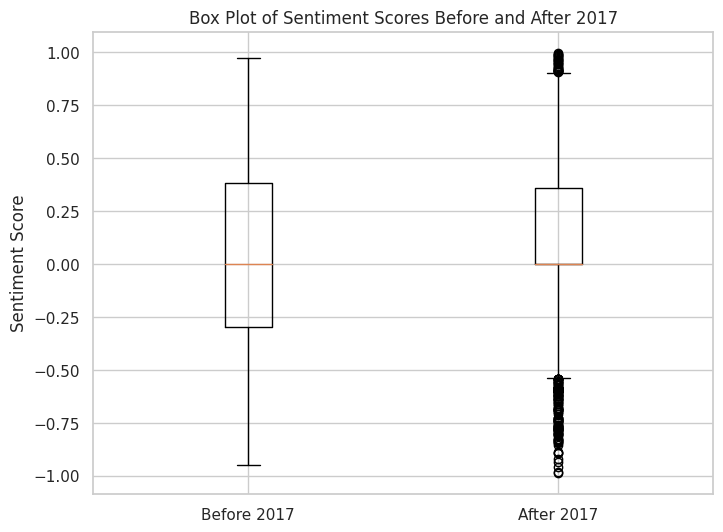

In [66]:
import matplotlib.pyplot as plt

# Sentiment data for before 2017 and after 2017
sentiments_before_2017 = df_sentiments_pre_2017['sentiment']
sentiments_after_2017 = df_sentiments_post_2017['sentiment']

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create a box plot with whiskers for both periods
ax.boxplot([sentiments_before_2017, sentiments_after_2017], labels=['Before 2017', 'After 2017'])

# Set the y-axis label
ax.set_ylabel('Sentiment Score')

# Set the title
ax.set_title('Box Plot of Sentiment Scores Before and After 2017')

# Show the plot
plt.show()


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Number of comments collected: 2000
                                                comment  sentiment  \
0     Great news.  I worked on the 72nd St station. ...     0.5423   
1     Thank the lord.  I can't wait to not have to l...     0.3612   
2     Followed by an escalator breaking down at 12:0...     0.0000   
3                       I'll believe it when I see it.      0.0000   
4     This is what tax payer money is for. I can sup...     0.4019   
...                                                 ...        ...   
1995                                          [removed]     0.0000   
1996  Good on you, I still love science and chemistr...     0.9571   
1997  I'm an electrician and in my experience, all y...     0.9423   
1998  Probably one of the best trades for anyone wit...     0.9792   
1999  > For most people, a masters degree is a waste...    -0.4617   

           creation_date  
0    2016-12-19 15:02:06  
1    2016-12-19 14:16:28  
2    2016-12-19 14:56:05  
3    2016-12-19 

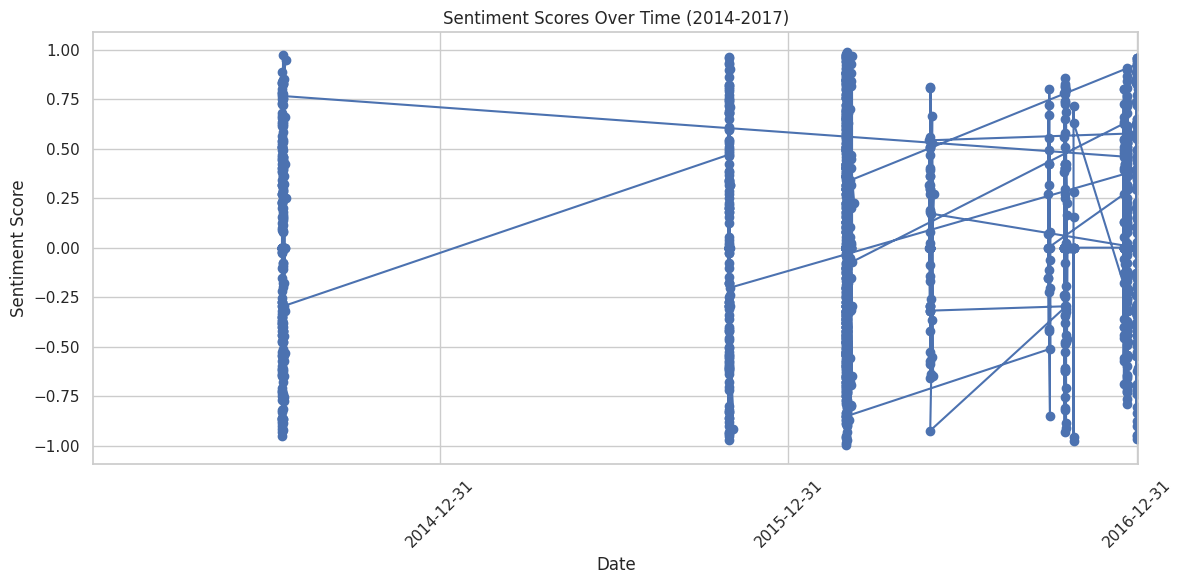

In [79]:
import praw
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import datetime
import matplotlib.pyplot as plt

# Initialize PRAW and SentimentIntensityAnalyzer
reddit = praw.Reddit(client_id='qjS2-KD1gkfsYMplOXMXhA',
                     client_secret='0RuIJ_ogxP7KJDOlovbfjucA8Myh8w',
                     user_agent='twohatguy')
sia = SentimentIntensityAnalyzer()

# Define the start and end dates (January 1, 2014 to January 1, 2017) in Unix timestamp
start_date = int(datetime.datetime(2014, 1, 1).timestamp())
end_date = int(datetime.datetime(2017, 1, 1).timestamp())

# Define the desired number of comments to collect
desired_comment_count = 2000

# Search for comments related to the Second Avenue Subway and limit to 100 submissions
submissions = reddit.subreddit('all').search('Second Avenue Subway', limit=100)

# Analyzing sentiment of comments and storing creation dates
sentiments = []
creation_dates = []  # To store creation dates
comment_count = 0

for submission in submissions:
    # Limit to 100 comments from each submission
    submission.comments.replace_more(limit=100)

    for comment in submission.comments.list():
        creation_date = comment.created_utc

        # Check if the comment falls within the specified date range
        if start_date <= creation_date < end_date:
            sentiment_score = sia.polarity_scores(comment.body)
            sentiments.append({
                "comment": comment.body,
                "sentiment": sentiment_score['compound'],
                "creation_date": creation_date  # Extract and store creation time
            })
            creation_dates.append(pd.to_datetime(creation_date, unit='s'))  # Convert to datetime

            comment_count += 1

            # Check if you have collected the desired number of comments and exit the loop
            if comment_count >= desired_comment_count:
                break

    # Check again to break the outer loop
    if comment_count >= desired_comment_count:
        break

# Convert to DataFrame for easier handling and indicate it's prior to 2017
df_sentiments_pre_2017 = pd.DataFrame(sentiments)
df_sentiments_pre_2017['creation_date'] = creation_dates  # Add creation_date column

# Display the DataFrame
print("Number of comments collected:", len(df_sentiments_pre_2017))
print(df_sentiments_pre_2017)

# Create a line plot for sentiment scores over time
plt.figure(figsize=(12, 6))
plt.plot(df_sentiments_pre_2017['creation_date'], df_sentiments_pre_2017['sentiment'], marker='o', linestyle='-')
plt.title("Sentiment Scores Over Time (2014-2017)")
plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.grid(True)

# Customize the x-axis to show years
plt.xticks(pd.date_range(start='2014-01-01', end='2017-01-01', freq='Y'))
plt.xlim(pd.Timestamp('2014-01-01'), pd.Timestamp('2017-01-01'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


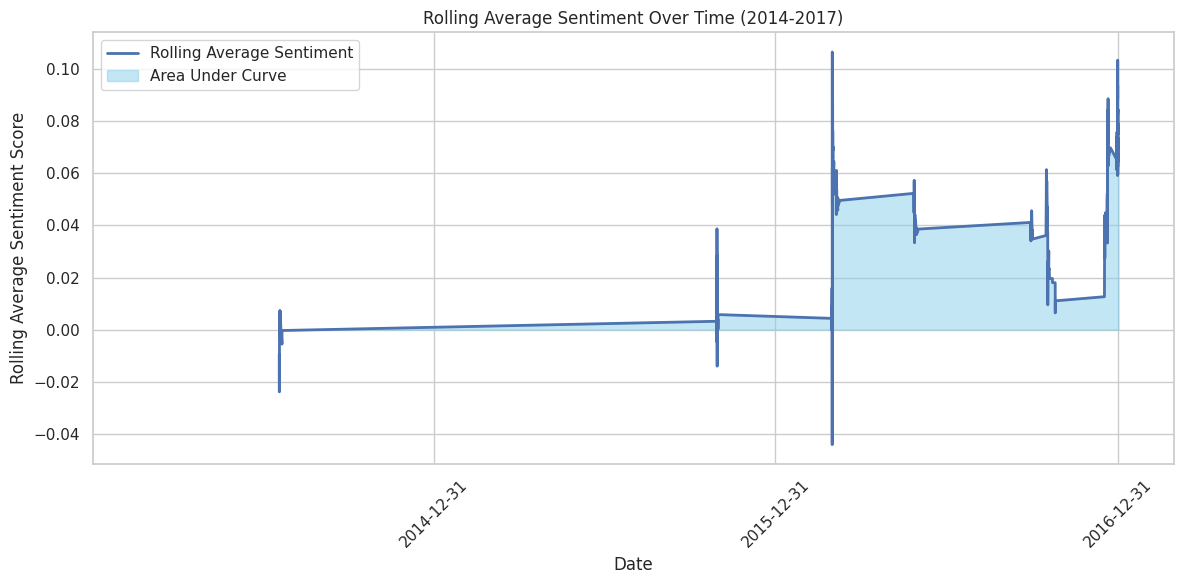

In [99]:
import datetime
import matplotlib.pyplot as plt

# Define the start and end dates (January 1, 2014 to December 1, 2023) as datetime objects
start_date = datetime.datetime(2014, 1, 1)
end_date = datetime.datetime(2017, 3, 1)

# Filter the sentiment scores within the desired date range
filtered_sentiments = df_sentiments_pre_2017[(df_sentiments_pre_2017['creation_date'] >= start_date) &
                                              (df_sentiments_pre_2017['creation_date'] <= end_date)]

# Sort the DataFrame by creation_date
filtered_sentiments = filtered_sentiments.sort_values(by='creation_date')

# Calculate a rolling mean of sentiment scores over a specified window (e.g., 180 days)
rolling_mean = filtered_sentiments['sentiment'].rolling(window=200).mean()

# Create a line plot for the rolling mean sentiment scores over time
plt.figure(figsize=(12, 6))

# Plot the rolling mean line
plt.plot(filtered_sentiments['creation_date'], rolling_mean, linestyle='-', linewidth=2, label='Rolling Average Sentiment')

# Fill the area under the rolling mean line with color
plt.fill_between(filtered_sentiments['creation_date'], rolling_mean, color='skyblue', alpha=0.5, label='Area Under Curve')

plt.title("Rolling Average Sentiment Over Time (2014-2017)")
plt.xlabel("Date")
plt.ylabel("Rolling Average Sentiment Score")
plt.grid(True)
plt.legend()

# Customize the x-axis to show years
plt.xticks(pd.date_range(start='2014-01-01', end='2017-03-01', freq='Y'))
plt.xlim(pd.Timestamp('2014-01-01'), pd.Timestamp('2017-03-01'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


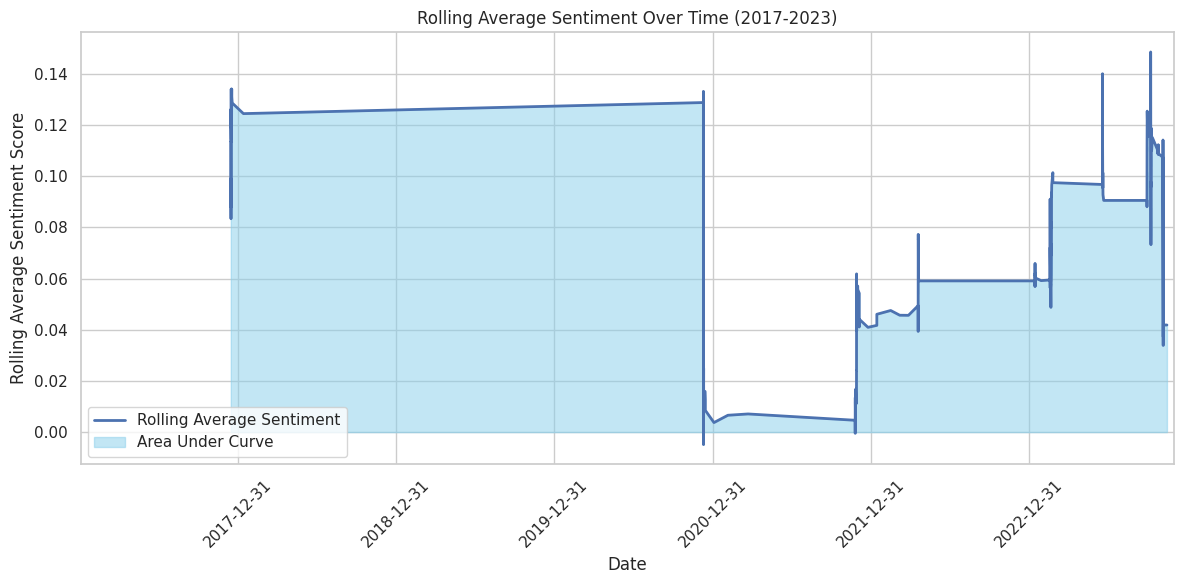

In [102]:
import datetime
import matplotlib.pyplot as plt

# Convert the 'creation_date' column to datetime format in df_sentiments_post_2017
df_sentiments_post_2017['creation_date'] = pd.to_datetime(df_sentiments_post_2017['creation_date'], unit='s')

# Define the start and end dates (January 1, 2017 to December 1, 2023) as datetime objects
start_date = datetime.datetime(2017, 1, 1)
end_date = datetime.datetime(2023, 12, 1)

# Filter the sentiment scores within the desired date range from df_sentiments_post_2017
filtered_sentiments = df_sentiments_post_2017[(df_sentiments_post_2017['creation_date'] >= start_date) &
                                              (df_sentiments_post_2017['creation_date'] <= end_date)]

# Sort the DataFrame by creation_date
filtered_sentiments = filtered_sentiments.sort_values(by='creation_date')

# Calculate a rolling mean of sentiment scores over a specified window (e.g., 200 days)
rolling_mean = filtered_sentiments['sentiment'].rolling(window=200).mean()

# Create a line plot for the rolling mean sentiment scores over time
plt.figure(figsize=(12, 6))

# Plot the rolling mean line
plt.plot(filtered_sentiments['creation_date'], rolling_mean, linestyle='-', linewidth=2, label='Rolling Average Sentiment')

# Fill the area under the rolling mean line with color
plt.fill_between(filtered_sentiments['creation_date'], rolling_mean, color='skyblue', alpha=0.5, label='Area Under Curve')

plt.title("Rolling Average Sentiment Over Time (2017-2023)")
plt.xlabel("Date")
plt.ylabel("Rolling Average Sentiment Score")
plt.grid(True)
plt.legend()

# Customize the x-axis to show years
plt.xticks(pd.date_range(start='2017-01-01', end='2023-12-01', freq='Y'))
plt.xlim(pd.Timestamp('2017-01-01'), pd.Timestamp('2023-12-01'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


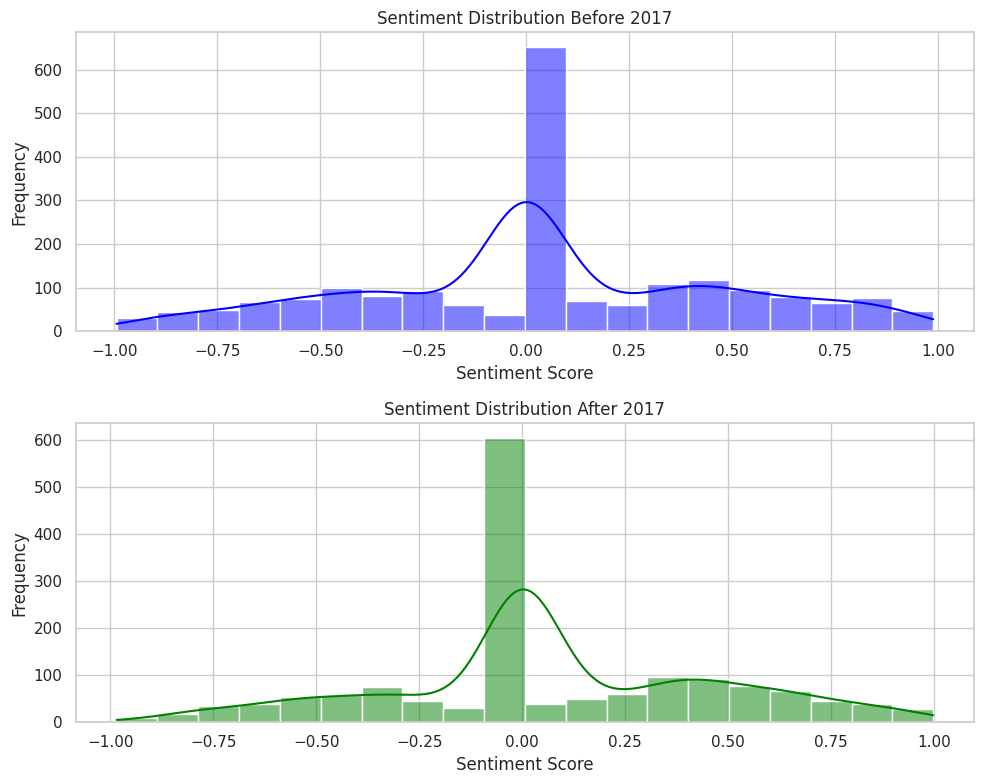

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Plot histograms for sentiment distribution before 2017
sns.histplot(df_sentiments_pre_2017['sentiment'], bins=20, kde=True, color='blue', ax=axes[0])
axes[0].set_title("Sentiment Distribution Before 2017")
axes[0].set_xlabel("Sentiment Score")
axes[0].set_ylabel("Frequency")

# Plot histograms for sentiment distribution after 2017
sns.histplot(df_sentiments_post_2017['sentiment'], bins=20, kde=True, color='green', ax=axes[1])
axes[1].set_title("Sentiment Distribution After 2017")
axes[1].set_xlabel("Sentiment Score")
axes[1].set_ylabel("Frequency")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


In [104]:
# Remove rows with 'sentiment' values between -0.0000001 and 0.0000001 for data before 2017
df_sentiments_pre_2017_nonull = df_sentiments_pre_2017[(df_sentiments_pre_2017['sentiment'] < -0.0000001) | (df_sentiments_pre_2017['sentiment'] > 0.0000001)]

# Remove rows with 'sentiment' values between -0.0000001 and 0.0000001 for data after 2017
df_sentiments_post_2017_nonull = df_sentiments_post_2017[(df_sentiments_post_2017['sentiment'] < -0.0000001) | (df_sentiments_post_2017['sentiment'] > 0.0000001)]

# Analysis for data before 2017
mean_sentiment_pre_2017_nonull = df_sentiments_pre_2017_nonull['sentiment'].mean()
summary_pre_2017_nonull = df_sentiments_pre_2017_nonull['sentiment'].describe()

# Analysis for data after 2017
mean_sentiment_post_2017_nonull = df_sentiments_post_2017_nonull['sentiment'].mean()
summary_post_2017_nonull = df_sentiments_post_2017_nonull['sentiment'].describe()

# Print results
print("Average Sentiment Before 2017_nonull: ", mean_sentiment_pre_2017_nonull)
print(summary_pre_2017_nonull)
print("\nAverage Sentiment After 2017: ", mean_sentiment_post_2017_nonull)
print(summary_post_2017_nonull)


Average Sentiment Before 2017_nonull:  0.058179971181556184
count    1388.000000
mean        0.058180
std         0.534645
min        -0.994800
25%        -0.401900
50%         0.128000
75%         0.505500
max         0.988500
Name: sentiment, dtype: float64

Average Sentiment After 2017:  0.11929258496395467
count    971.000000
mean       0.119293
std        0.501494
min       -0.985100
25%       -0.318200
50%        0.244900
75%        0.519800
max        0.997300
Name: sentiment, dtype: float64


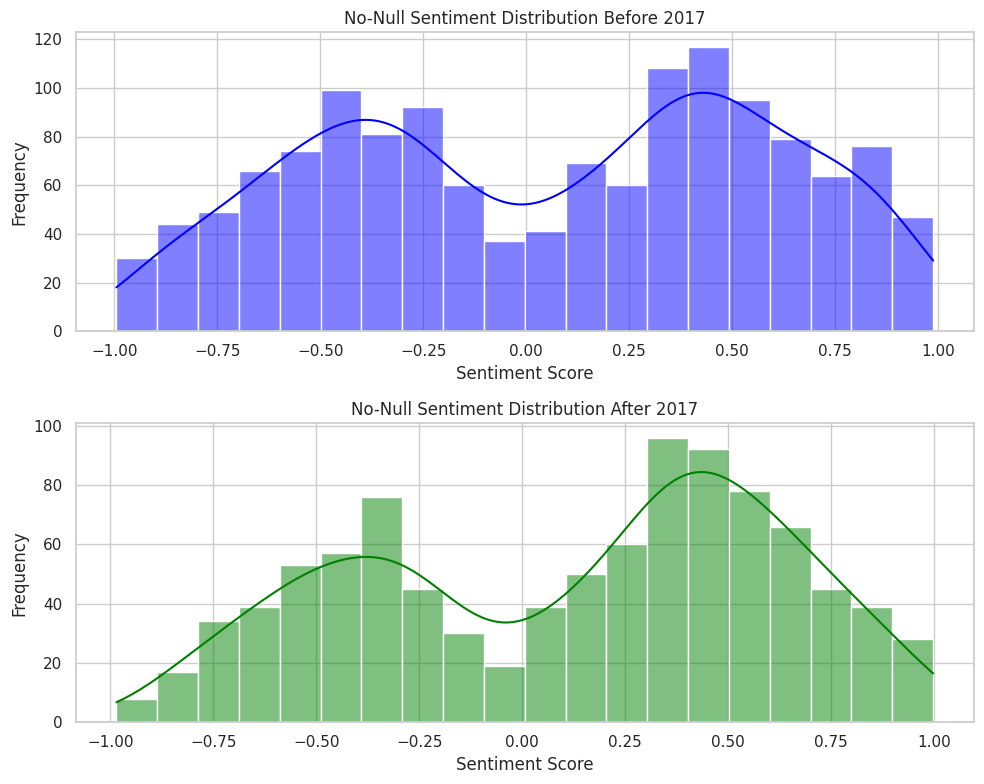

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Plot histograms for sentiment distribution before 2017
sns.histplot(df_sentiments_pre_2017_nonull['sentiment'], bins=20, kde=True, color='blue', ax=axes[0])
axes[0].set_title("No-Null Sentiment Distribution Before 2017")
axes[0].set_xlabel("Sentiment Score")
axes[0].set_ylabel("Frequency")

# Plot histograms for sentiment distribution after 2017
sns.histplot(df_sentiments_post_2017_nonull['sentiment'], bins=20, kde=True, color='green', ax=axes[1])
axes[1].set_title("No-Null Sentiment Distribution After 2017")
axes[1].set_xlabel("Sentiment Score")
axes[1].set_ylabel("Frequency")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


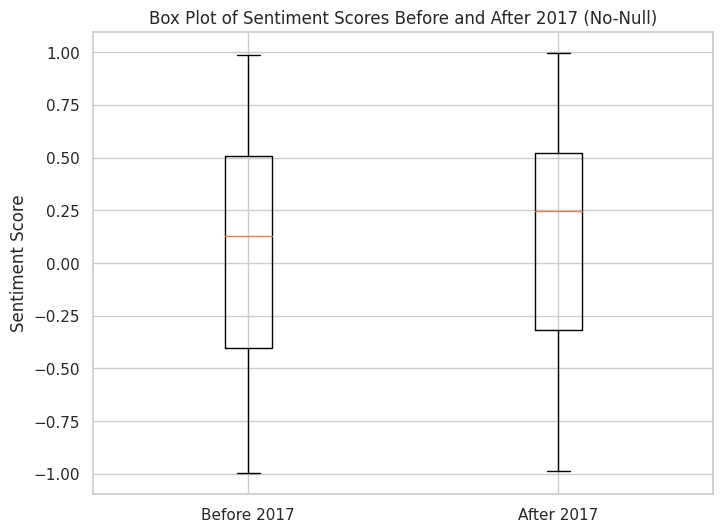

In [107]:
import matplotlib.pyplot as plt

# Sentiment data for before 2017 and after 2017
sentiments_before_2017 = df_sentiments_pre_2017_nonull['sentiment']
sentiments_after_2017 = df_sentiments_post_2017_nonull['sentiment']

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create a box plot with whiskers for both periods
ax.boxplot([sentiments_before_2017, sentiments_after_2017], labels=['Before 2017', 'After 2017'])

# Set the y-axis label
ax.set_ylabel('Sentiment Score')

# Set the title
ax.set_title('Box Plot of Sentiment Scores Before and After 2017 (No-Null)')

# Show the plot
plt.show()


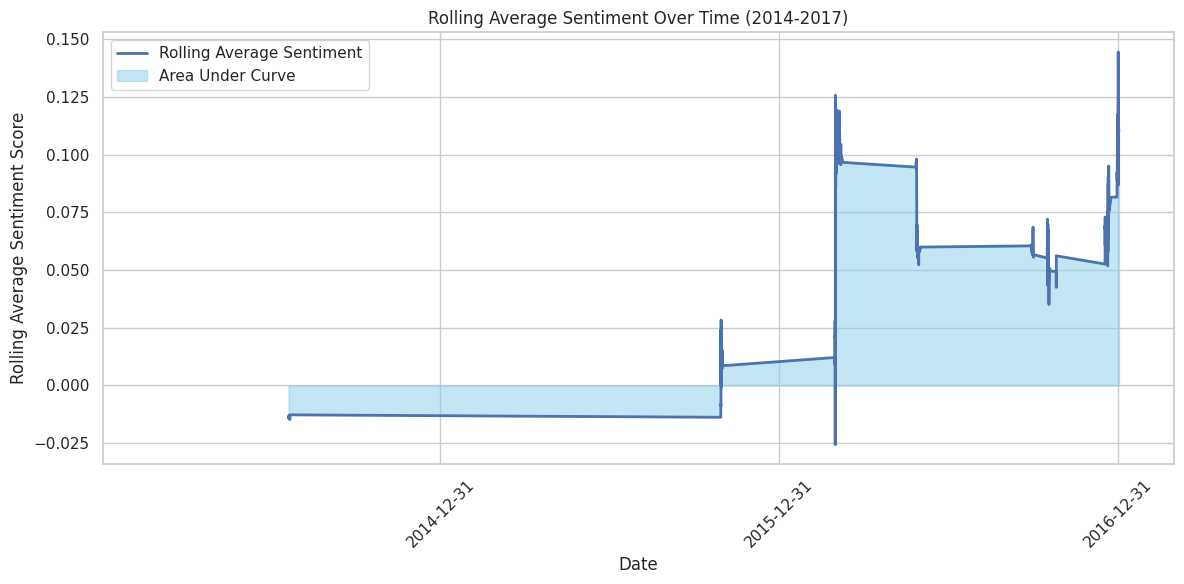

In [110]:
import datetime
import matplotlib.pyplot as plt

# Define the start and end dates (January 1, 2014 to December 1, 2023) as datetime objects
start_date = datetime.datetime(2014, 1, 1)
end_date = datetime.datetime(2017, 3, 1)

# Filter the sentiment scores within the desired date range
filtered_sentiments = df_sentiments_pre_2017_nonull[(df_sentiments_pre_2017_nonull['creation_date'] >= start_date) &
                                              (df_sentiments_pre_2017_nonull['creation_date'] <= end_date)]

# Sort the DataFrame by creation_date
filtered_sentiments = filtered_sentiments.sort_values(by='creation_date')

# Calculate a rolling mean of sentiment scores over a specified window (e.g., 180 days)
rolling_mean = filtered_sentiments['sentiment'].rolling(window=200).mean()

# Create a line plot for the rolling mean sentiment scores over time
plt.figure(figsize=(12, 6))

# Plot the rolling mean line
plt.plot(filtered_sentiments['creation_date'], rolling_mean, linestyle='-', linewidth=2, label='Rolling Average Sentiment')

# Fill the area under the rolling mean line with color
plt.fill_between(filtered_sentiments['creation_date'], rolling_mean, color='skyblue', alpha=0.5, label='Area Under Curve')

plt.title("Rolling Average Sentiment Over Time (2014-2017)")
plt.xlabel("Date")
plt.ylabel("Rolling Average Sentiment Score")
plt.grid(True)
plt.legend()

# Customize the x-axis to show years
plt.xticks(pd.date_range(start='2014-01-01', end='2017-03-01', freq='Y'))
plt.xlim(pd.Timestamp('2014-01-01'), pd.Timestamp('2017-03-01'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-111-ceca18a1139e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiments_post_2017_nonull['creation_date'] = pd.to_datetime(df_sentiments_post_2017['creation_date'], unit='s')


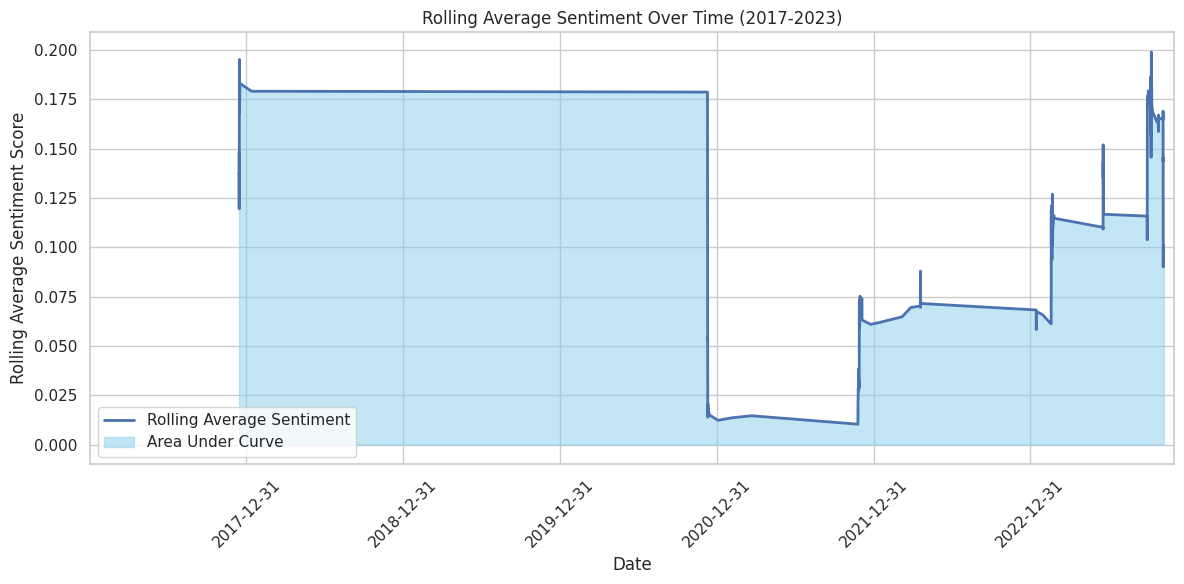

In [111]:
import datetime
import matplotlib.pyplot as plt

# Convert the 'creation_date' column to datetime format in df_sentiments_post_2017
df_sentiments_post_2017_nonull['creation_date'] = pd.to_datetime(df_sentiments_post_2017['creation_date'], unit='s')

# Define the start and end dates (January 1, 2017 to December 1, 2023) as datetime objects
start_date = datetime.datetime(2017, 1, 1)
end_date = datetime.datetime(2023, 12, 1)

# Filter the sentiment scores within the desired date range from df_sentiments_post_2017
filtered_sentiments = df_sentiments_post_2017_nonull[(df_sentiments_post_2017_nonull['creation_date'] >= start_date) &
                                              (df_sentiments_post_2017_nonull['creation_date'] <= end_date)]

# Sort the DataFrame by creation_date
filtered_sentiments = filtered_sentiments.sort_values(by='creation_date')

# Calculate a rolling mean of sentiment scores over a specified window (e.g., 200 days)
rolling_mean = filtered_sentiments['sentiment'].rolling(window=200).mean()

# Create a line plot for the rolling mean sentiment scores over time
plt.figure(figsize=(12, 6))

# Plot the rolling mean line
plt.plot(filtered_sentiments['creation_date'], rolling_mean, linestyle='-', linewidth=2, label='Rolling Average Sentiment')

# Fill the area under the rolling mean line with color
plt.fill_between(filtered_sentiments['creation_date'], rolling_mean, color='skyblue', alpha=0.5, label='Area Under Curve')

plt.title("Rolling Average Sentiment Over Time (2017-2023)")
plt.xlabel("Date")
plt.ylabel("Rolling Average Sentiment Score")
plt.grid(True)
plt.legend()

# Customize the x-axis to show years
plt.xticks(pd.date_range(start='2017-01-01', end='2023-12-01', freq='Y'))
plt.xlim(pd.Timestamp('2017-01-01'), pd.Timestamp('2023-12-01'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()
